<h3><b>When to Use Ridge Regression?</b></h3>
<h4>
Ridge Regression is most suitable when all predictors are expected to contribute to the outcome and none should be excluded from the model. It reduces overfitting by shrinking the coefficients, ensuring they don’t become too large, while still keeping all the predictors in the model.

<b>For example,</b> when predicting house prices, features like size, number of bedrooms, location, and year built are all likely relevant. Ridge Regression ensures these features remain in the model but with reduced influence to create a balanced and robust prediction.</h4>

<h3> When to Use Lasso Regression?</h3>
<h4>Lasso Regression is ideal when you suspect that only a few predictors are truly important, and the rest may add noise or redundancy. It performs automatic feature selection by shrinking the coefficients of less important predictors to zero, effectively removing them from the model.

<b>For example,</b> in genetic research, where thousands of genes are analyzed for their effect on a disease, Lasso Regression helps by identifying only the most impactful genes and ignoring the irrelevant ones, leading to a simpler and more interpretable model.</h4>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name="Price")

print(X.head())
print(y.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [13]:
y_pred_lr = lr.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)

In [15]:
models = {
    'Linear Regression': y_pred_lr,
    'Ridge Regression': y_pred_ridge,
    'Lasso Regression': y_pred_lasso
}

for name, pred in models.items():
    print(f"\n{name}")
    print("MSE:", mean_squared_error(y_test, pred))
    print("R² Score:", r2_score(y_test, pred))


Linear Regression
MSE: 0.5558915986952444
R² Score: 0.5757877060324508

Ridge Regression
MSE: 0.555854858943597
R² Score: 0.5758157428913684

Lasso Regression
MSE: 0.6796290284328825
R² Score: 0.48136113250290735


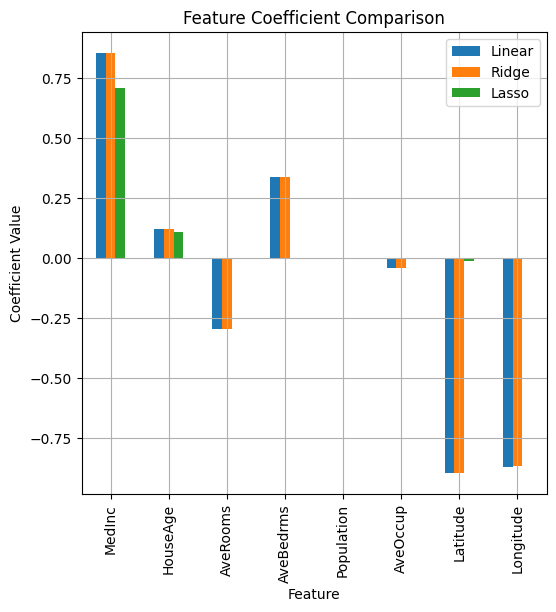

0        MedInc
1      HouseAge
2      AveRooms
3     AveBedrms
4    Population
5      AveOccup
6      Latitude
7     Longitude
Name: Feature, dtype: object


In [23]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Linear': lr.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
})

coef_df.set_index('Feature').plot(kind='bar', figsize=(6, 6))
plt.title("Feature Coefficient Comparison")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()
print(coef_df["Feature"])

In [25]:
print(california.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [27]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [29]:
print(california.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]
